# Using `BertNLU`

In [1]:
# imports
from dialognlu import BertNLU, AutoNLU
from dialognlu.readers.goo_format_reader import Reader

import ipywidgets as widgets
import json

## Reading Training and Validation Datasets

In [2]:
train_path = "../data/snips/train" # please, specify the path to your dataset
val_path = "../data/snips/valid" # please, specify the path to your dataset

train_dataset = Reader.read(train_path)
val_dataset = Reader.read(val_path)

## Initialize `BertNLU` model

Choose `model_type`

In [3]:
model_type_wid = widgets.Dropdown(options=['bert', 'albert'], value='bert', description='model_type:', 
                                  disabled=False)
display(model_type_wid)

Dropdown(description='model_type:', options=('bert', 'albert'), value='bert')

In [4]:
model_type = model_type_wid.value
config = {
    "model_type": model_type #"bert" #"albert"
}
print(config)

# initialize BertNLU from config
nlu = BertNLU.from_config(config)

INFO:absl:Using /tmp/tfhub_modules to cache modules.


{'model_type': 'bert'}


## Train `BertNLU` model

Vectorizing training text ...
Fitting tags encoder ...
Fitting intent encoder ...
Encoding training tags ...
Encoding training intents ...
Vectorizing validation text ...
Encoding validation tags ...
Encoding validation intents ...
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, None)]       0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
input_type_ids (InputLayer)     [(None, None)]       0                                            
____________________________________________________________

/home/mwahdan/anaconda3/envs/nlp_env/lib/python3.8/site-packages/tensorflow/python/keras/engine/functional.py:592: UserWarning: Input dict contained keys ['sequence_lengths'] which did not match any model input. They will be ignored by the model.
  warnings.warn(


409/409 [==============================] - 124s 276ms/step - loss: 10.4169 - slots_tagger_loss: 3.3259 - intent_classifier_loss: 0.4391 - intent_classifier_acc: 0.8540 - val_loss: 7.7083 - val_slots_tagger_loss: 2.5623 - val_intent_classifier_loss: 0.0215 - val_intent_classifier_acc: 0.9943
Epoch 2/3
409/409 [==============================] - 111s 272ms/step - loss: 9.2427 - slots_tagger_loss: 3.0710 - intent_classifier_loss: 0.0296 - intent_classifier_acc: 0.9916 - val_loss: 7.7178 - val_slots_tagger_loss: 2.5601 - val_intent_classifier_loss: 0.0373 - val_intent_classifier_acc: 0.9857
Epoch 3/3
409/409 [==============================] - 113s 275ms/step - loss: 9.2235 - slots_tagger_loss: 3.0690 - intent_classifier_loss: 0.0165 - intent_classifier_acc: 0.9942 - val_loss: 7.6928 - val_slots_tagger_loss: 2.5555 - val_intent_classifier_loss: 0.0264 - val_intent_classifier_acc: 0.9886


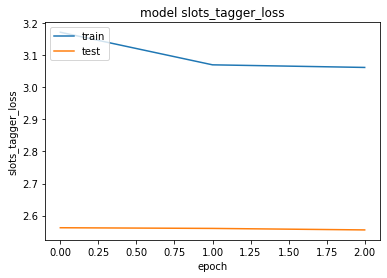

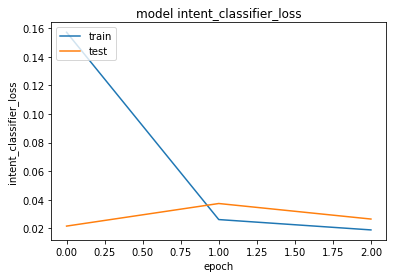

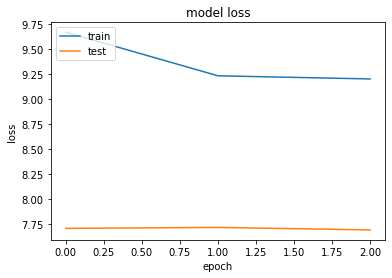

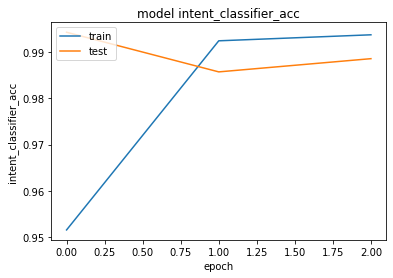

In [5]:
# start model training
nlu.train(train_dataset, val_dataset, epochs=3, batch_size=32)

## Save the trained model

In [6]:
save_path = f"../saved_models/joint_{model_type}_model"

print(f"Saving model to '{save_path}' ...")
nlu.save(save_path)
print("Saved!")

Saving model to '../saved_models/joint_bert_model' ...
Saved!


## [Optional] Load the model from disk

In [7]:
print("Loading model ...")
nlu = AutoNLU.load(save_path)

Loading model ...
Loading BertNLU ...
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, None)]       0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
input_type_ids (InputLayer)     [(None, None)]       0                                            
__________________________________________________________________________________________________
BertLayer (KerasLayer)          [(None, 768), (None, 109482241   input_word_ids[0][0]             
                                                      

## Reading Testing Dataset

In [8]:
test_path = "../data/snips/test" # please, specify the path to the testing dataset
test_dataset = Reader.read(test_path)

## Evaluating model

In [9]:
token_f1_score, tag_f1_score, report, acc = nlu.evaluate(test_dataset)

print('Slot Classification Report:', report)
print('Slot token f1_score = %f' % token_f1_score)
print('Slot tag f1_score = %f' % tag_f1_score)
print('Intent accuracy = %f' % acc)

Vectorizing validation text ...
Slot Classification Report:                             precision    recall  f1-score   support

                     album     0.1579    0.3000    0.2069        10
                    artist     0.9196    0.9626    0.9406       107
               best_rating     1.0000    1.0000    1.0000        43
                      city     1.0000    0.9833    0.9916        60
     condition_description     1.0000    1.0000    1.0000        28
     condition_temperature     1.0000    1.0000    1.0000        23
                   country     1.0000    0.9773    0.9885        44
                   cuisine     0.9167    0.7857    0.8462        14
          current_location     1.0000    1.0000    1.0000        14
               entity_name     0.8387    0.7879    0.8125        33
                  facility     1.0000    1.0000    1.0000         3
                     genre     1.0000    1.0000    1.0000         5
            geographic_poi     1.0000    1.0000    1.00

## Make Predictions

In [10]:
l = widgets.Layout(flex='0 1 auto', height='40px', min_height='30px', width='auto')
utterance_txt = widgets.Textarea(
    value='add sabrina salerno to the grime instrumentals playlist',
    placeholder='Type utterance here!',
    description='Utterance:',
    layout=l,
    disabled=False
)

predict_btn = widgets.Button(
    description='Predict'
)

result_layout = widgets.Layout(flex='0 1 auto', height='400px', min_height='30px', width='auto')
result_txt = widgets.Textarea(
    value='',
    placeholder='Result goes here',
    description='Result:',
    layout=result_layout,
    disabled=True
)


def btn_click_event(x):
    result = nlu.predict(utterance_txt.value)
    result = json.dumps(result, indent=4, sort_keys=True)
    result_txt.value = result
    
predict_btn.on_click(btn_click_event)
display(utterance_txt, predict_btn, result_txt)


Textarea(value='add sabrina salerno to the grime instrumentals playlist', description='Utterance:', layout=Lay…

Button(description='Predict', style=ButtonStyle())

Textarea(value='', description='Result:', disabled=True, layout=Layout(flex='0 1 auto', height='400px', min_he…